# Exploration of the Data: Visualizations, transformations, and experiments

 Here we are going to generate our visuals and gain a more detailed picture of the data

### Once again we are going to load in our data sets, but in order to create the desired plots, we're gonna merge the two dataframes

#### Why do we need to do this?
Our two datasets tell the history of music through different methods. the first data describes the name of the songs, the artist, and the year it was released. Then it includes word counts, key, and tempo.
The second data provides a breakdown of each song, showing specific musical characteristics such as pitch variability, rhythmic density, and structural labels (e.g., verse, chorus) for every individual segment of the track.

Combining these two datasets will give us a *complete picture* of the history of music through the years, and allow us to paint a better picture of the change over time.

### Step 1: Import the data

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load
df_songs = pd.read_csv('bimmuda_per_song_full.csv')
df_melody = pd.read_csv('bimmuda_per_melody_full.csv')


### Step 2: Prepare & Merge / Create Year Averages for Plots

We need to merge on 'Year' and 'Position'. 

'Position' must be a string in both files to match (e.g., "1" matching "1").

In [2]:
# 2. Merge
df_songs['Position'] = df_songs['Position'].astype(str)
df_melody['Position'] = df_melody['Position'].astype(str)
df_merged = pd.merge(df_melody, df_songs, on=['Year', 'Position'], how='left')

# 3. Create "Helper" Columns
df_merged['Decade'] = (df_merged['Year'] // 10) * 10

# 4. Create the "Averaged" Dataset
yearly_stats = df_merged.groupby('Year')[['Unique Word Ratio', 'Pitch STD', 'Onset Density', 'Number of Words']].mean().reset_index()


### Step 3: Explore the data and look for patterns

Here we will look for patterns in the data and try to understand the trends in the data through histograms and line plots.

/var/folders/89/vy1sctd5199dh7fb1_5765v00000gn/T/ipykernel_17820/1188528988.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Label', data=df_merged, order=df_merged['Label'].value_counts().index[:5], palette='gray')


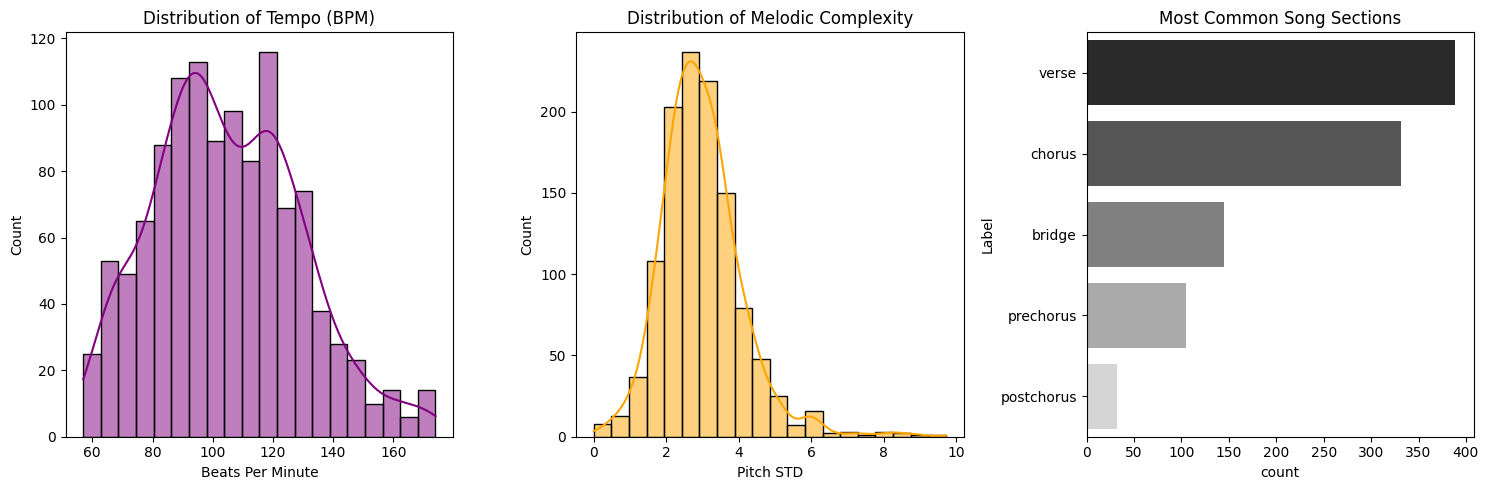

In [3]:

plt.figure(figsize=(15, 5))

# Plot A: Histogram of Tempo (BPM)
plt.subplot(1, 3, 1)
sns.histplot(df_merged['BPM'], bins=20, kde=True, color='purple')
plt.title('Distribution of Tempo (BPM)')
plt.xlabel('Beats Per Minute')

# Plot B: Histogram of Pitch Complexity
plt.subplot(1, 3, 2)
sns.histplot(df_merged['Pitch STD'], bins=20, kde=True, color='orange')
plt.title('Distribution of Melodic Complexity')
plt.xlabel('Pitch STD')

# Plot C: Count of Song Sections
plt.subplot(1, 3, 3)
sns.countplot(y='Label', data=df_merged, order=df_merged['Label'].value_counts().index[:5], palette='gray')
plt.title('Most Common Song Sections')

plt.tight_layout()
plt.show()

#### **Breakdown**

These aren't going to be directly used for our infographic, but still shows common traits among the top 5 songs from every year which is interesting to see.

**Distributions of Tempo (BPM)** has two peaks around 90 BPM and 120 BPM. This is interesting because it shows that popular songs are on average around this range.

This is similar to the **Distribution of Melodic Complexity** which peaks around a 3 Pitch STD showing the Pop standard of melodic complexity.



## Now let's look closer, using line plots to see whether songs are getting more or less complex over time. 

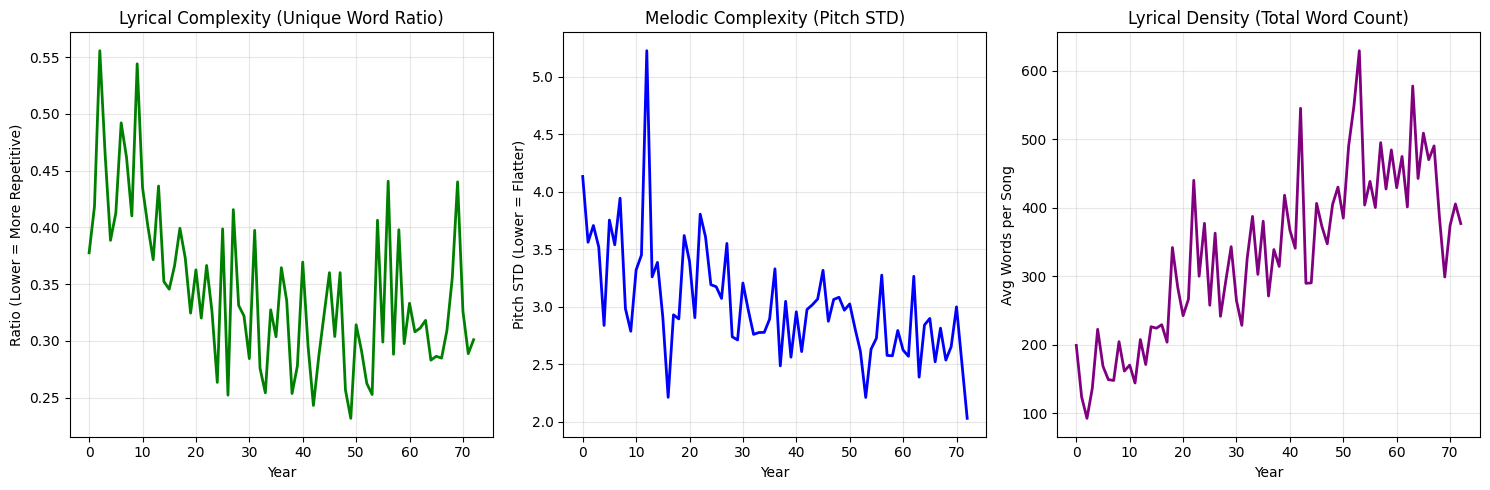

In [4]:

plt.figure(figsize=(15, 5))

# Plot 1: Are Lyrics getting more repetitive? (Unique Word Ratio)
# Trend: Downwards = Simpler Lyrics
plt.subplot(1, 3, 1)
plt.plot(yearly_stats.index, yearly_stats['Unique Word Ratio'], color='green', linewidth=2)
plt.title('Lyrical Complexity (Unique Word Ratio)')
plt.xlabel('Year')
plt.ylabel('Ratio (Lower = More Repetitive)')
plt.grid(True, alpha=0.3)

# Plot 2: Are Melodies getting flatter? (Pitch STD)
# Trend: Downwards = Simpler Melodies
plt.subplot(1, 3, 2)
plt.plot(yearly_stats.index, yearly_stats['Pitch STD'], color='blue', linewidth=2)
plt.title('Melodic Complexity (Pitch STD)')
plt.xlabel('Year')
plt.ylabel('Pitch STD (Lower = Flatter)')
plt.grid(True, alpha=0.3)

# Plot 3: Are we just singing MORE words? (Total Word Count)
# Trend: Upwards = More "Chatty" (Rap/Hip-hop influence)
plt.subplot(1, 3, 3)
plt.plot(yearly_stats.index, yearly_stats['Number of Words'], color='purple', linewidth=2)
plt.title('Lyrical Density (Total Word Count)')
plt.xlabel('Year')
plt.ylabel('Avg Words per Song')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### We can see above that the Unique Word Ratio is decreasing over time, the melodic complexity is decreasing over time, BUT the lyric density is increasing over the years...

This is an interesting paradox in trends, as the words per song actually increase as the years continue, suggesting that songs could be growing more complex over time in regards to lyrics. However, the Lyrical Complexity (Unique Word Ratio), argues the contrary, showing that although there are more words being used in songs, they are becoming more repetitive and therefore less complex.

# Step 4: Visualization Generation

Now that we've pinpointed trends over time that suggest both a decrease in complexity, but an increase in lyrical density. Let's look deeper into the relationships between them and what this can tell us about the history of music.

### Plot 1: Change of Melodic Complexity and Rhythmic Density over Time

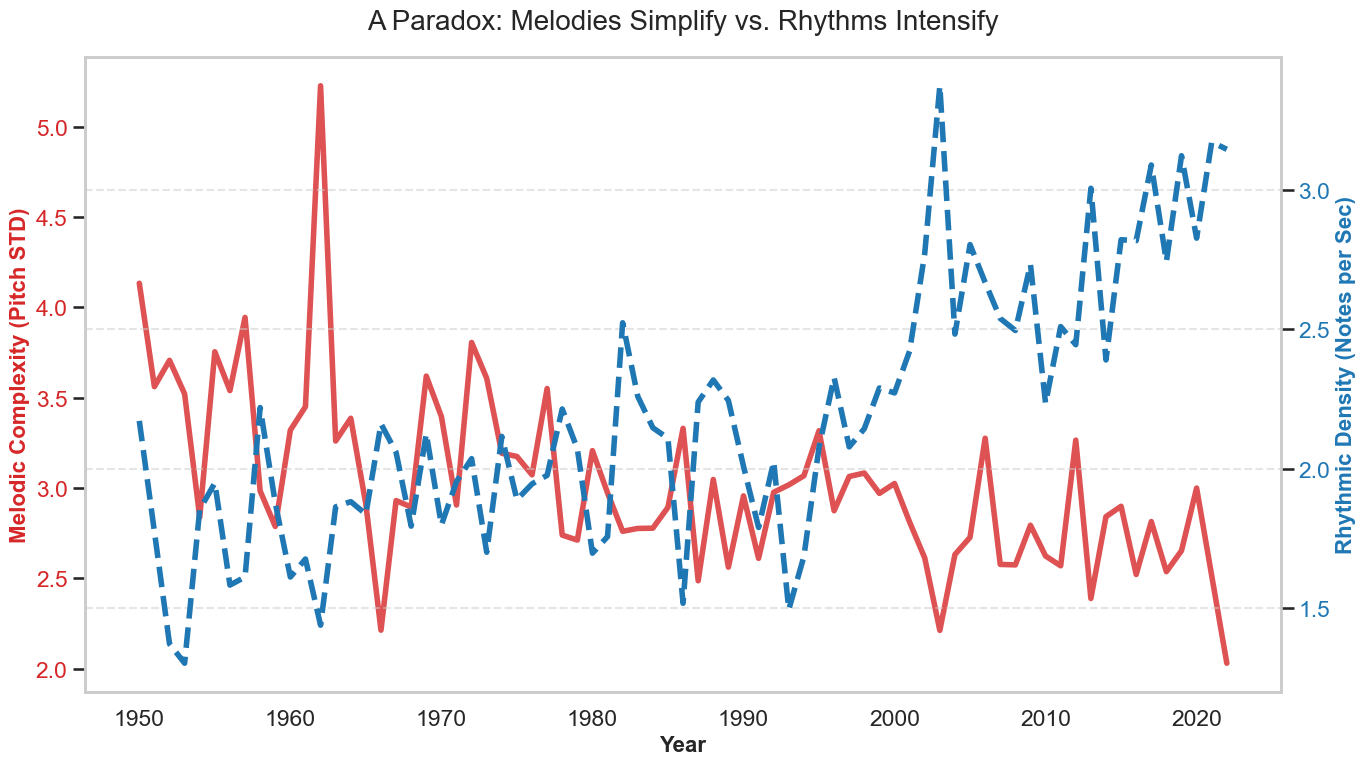

In [5]:


# ==========================================
# STEP 4: VISUALIZATION GENERATION
# ==========================================
sns.set_theme(style="whitegrid", context="talk")

# --- PLOT 1: THE POP PARADOX (Dual Axis) ---
# This proves: Melodies got simpler (Red line down), Rhythms got faster (Blue line up)
fig, ax1 = plt.subplots(figsize=(14, 8))

color_melody = '#d62728' # Red
ax1.set_xlabel('Year', fontsize=16, fontweight='bold')
ax1.set_ylabel('Melodic Complexity (Pitch STD)', color=color_melody, fontsize=16, fontweight='bold')
ax1.plot(yearly_stats['Year'], yearly_stats['Pitch STD'], color=color_melody, linewidth=4, alpha=0.8, label='Melody')
ax1.tick_params(axis='y', labelcolor=color_melody)
ax1.grid(False) # Turn off grid for cleaner look

ax2 = ax1.twinx() 
color_rhythm = '#1f77b4' # Blue
ax2.set_ylabel('Rhythmic Density (Notes per Sec)', color=color_rhythm, fontsize=16, fontweight='bold')
ax2.plot(yearly_stats['Year'], yearly_stats['Onset Density'], color=color_rhythm, linewidth=4, linestyle='--', label='Rhythm')
ax2.tick_params(axis='y', labelcolor=color_rhythm)
ax2.grid(axis='y', linestyle='--', alpha=0.5)

plt.title('A Paradox: Melodies Simplify vs. Rhythms Intensify', fontsize=20, pad=20)
plt.tight_layout()
plt.savefig('infographic_plot_1_paradox.png', dpi=300) # SAVES FILE FOR INFOGRAPHIC
plt.show()



##### **Breakdown**
The graph shows the change in melodic complexity and rhythmic density over time. The red line represents the change in melodic complexity, while the blue line represents the change in rhythmic density. The red line is decreasing, while the blue line is increasing. We can see that melodies are getting simpler, so songs and rhythms are getting faster over time. 

**Melodic Complexity:** The range of the singer, so if it is a high Pitch STD, that means the singer is singing a wider range of notes, so the melody is more complex. 

**Rhythmic Density:** The number of notes per second, so if it is a high Rhythmic Density, that means the song has more notes per second, so the rhythm is faster. This shows the songs are getting faster over time and popular songs are typically faster these days.

### Plot 2: Lyrical Repetition Scatter Plot

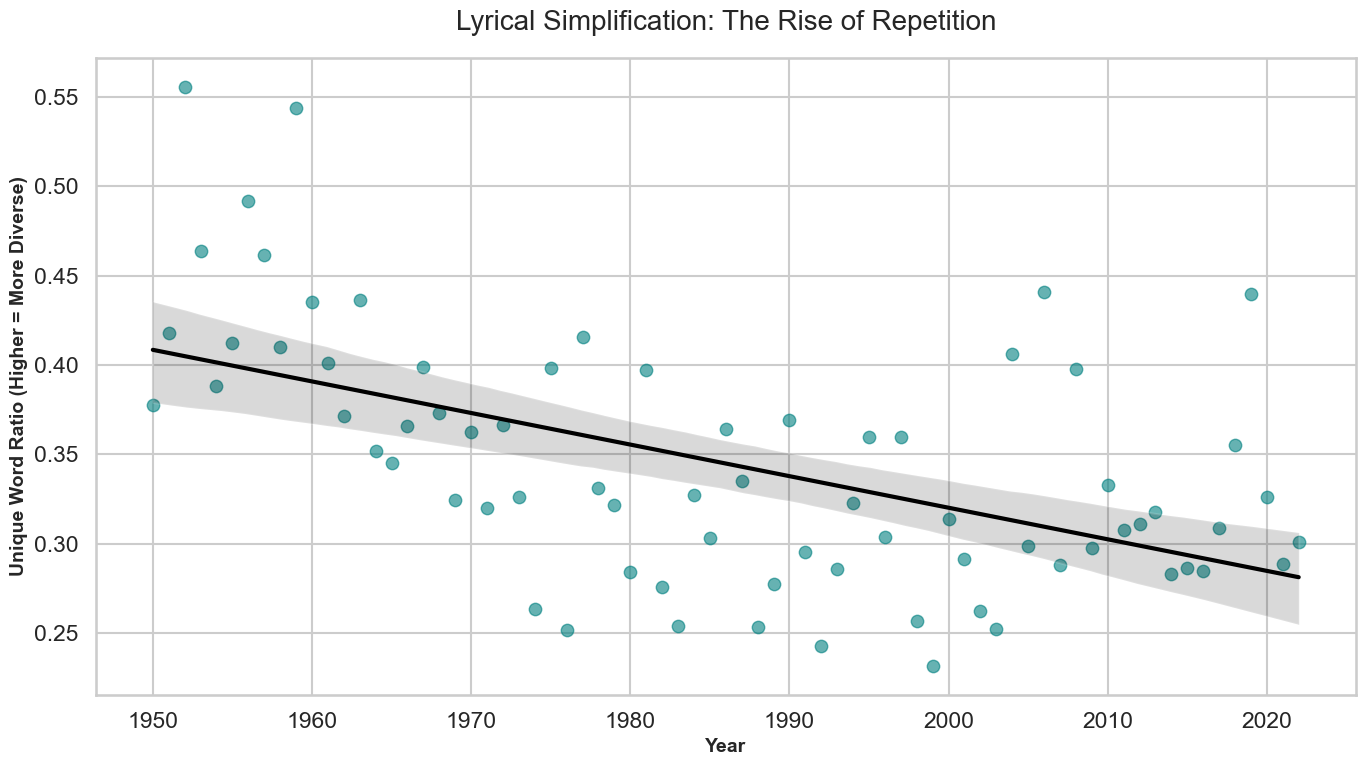

In [6]:


# --- PLOT 2: LYRICAL REPETITION (Scatter) ---
# This proves: Songs are using fewer unique words (Repetition is increasing)
plt.figure(figsize=(14, 8))
sns.regplot(data=yearly_stats, x='Year', y='Unique Word Ratio', 
            scatter_kws={'s': 80, 'alpha': 0.6, 'color': 'teal'},
            line_kws={'color': 'black', 'linewidth': 3})

plt.ylabel('Unique Word Ratio (Higher = More Diverse)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.title('Lyrical Simplification: The Rise of Repetition', fontsize=20, pad=20)
plt.tight_layout()
plt.savefig('infographic_plot_2_lyrics.png', dpi=300)
plt.show()



### **Breakdown: The Rise of Repetition**

**What we see:**
This scatter plot with a regression line shows the annual average `Unique Word Ratio` from 1950 to 2022.
* **X-Axis:** Year
* **Y-Axis:** Unique Word Ratio (1.0 = every word is unique; 0.1 = high repetition).

**Observation:**
There is a statistically clear **negative correlation**. The trend line drops steadily from ~0.45 in the mid-20th century to below 0.35 in the modern era.

**Interpretation:**
This confirms that lyrical "simplification" is real. Songwriters are increasingly prioritizing **repetition** (catchy hooks, repeated choruses) over vocabulary size. This aligns with the "attention economy" theory—songs must be instantly memorable to succeed on streaming platforms.

/var/folders/89/vy1sctd5199dh7fb1_5765v00000gn/T/ipykernel_17820/3844329892.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Decade', y='Pitch STD', data=df_merged, palette="Blues")


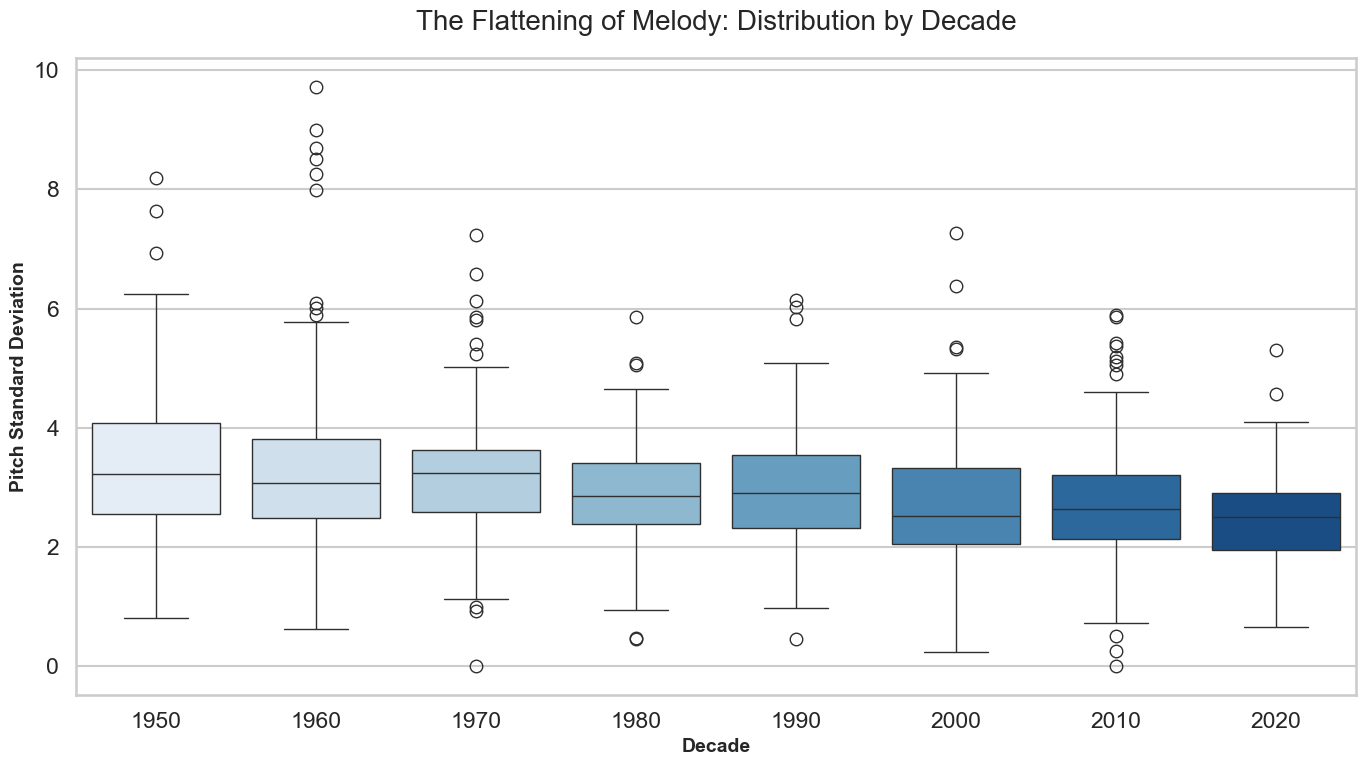

In [7]:


# --- PLOT 3: MELODIC RANGE (Box Plot) ---
# This proves: The "Range" of creativity is shrinking. 
plt.figure(figsize=(14, 8))
sns.boxplot(x='Decade', y='Pitch STD', data=df_merged, palette="Blues")

plt.xlabel('Decade', fontsize=14, fontweight='bold')
plt.ylabel('Pitch Standard Deviation', fontsize=14, fontweight='bold')
plt.title('The Flattening of Melody: Distribution by Decade', fontsize=20, pad=20)
plt.tight_layout()
plt.savefig('infographic_plot_3_boxplot.png', dpi=300)
plt.show()



### **Breakdown: The Shrinking Range of Creativity**

**What we see:**
This box plot groups melodic complexity (`Pitch STD`) by decade.
* **The Box:** Represents the middle 50% of songs.
* **The Whiskers:** Represent the range of typical songs.
* **The Dots:** Represent outliers (unusually complex songs).

**Observation:**
* **The Drop:** The median line (horizontal line inside the box) drops consistently, showing the "average" melody is getting flatter.
* **The Squeeze:** The boxes themselves are getting shorter. This is a critical insight: **Variation is disappearing.** In the 1950s, the "box" spanned a wide range of complexity (STD 2.0 to 4.5). By the 2020s, the box is compressed into a tiny range (STD 2.0 to 3.0).

**Interpretation:**
Pop music is not just getting simpler; it is getting **narrower**. The definition of what a "hit song" sounds like has become much stricter, leaving less room for melodic experimentation than in previous decades.